In [1]:
import numpy as np
from PIL import Image
import cv2
import csv
import os
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
folder = "../../data/strandvejen_faxe"
file_names = sorted(os.listdir(folder), key = lambda x: x[:4])
file_path = [folder + "/" + name for name in file_names]

In [3]:
model_output = pd.read_csv("../../output/custom/results/strandvejen_faxe.csv")

In [4]:
def get_img(img_path):
    img = cv2.imread(img_path)
    #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    #img = cv2.resize(img, (512, 512))
    return img

def hist_eq(img):
    hist,bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    return cdf[img]

def print_img(img):
    plt.figure(figsize=(15, 15))
    plt.imshow(img, cmap='Greys_r')
    
def draw_bounding(img, x1, x2, y1, y2, label):
    # draw a rectangle on the image
    h, w = img.shape[:2]
    cv2.putText(img, label , (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,12), 1)
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 255, 255), 2)

In [5]:
model_output.head(20)

,1,1.1,940.6565551757812,911.6228637695312,68.743896484375,40.65936279296875,-1,-1.1,-1.2,-1.3
0,1,2,933.929443,903.447571,92.070557,69.042664,-1,-1,-1,-1
1,1,3,902.208557,889.271484,108.785950,64.369202,-1,-1,-1,-1
2,1,4,819.626282,835.893005,58.325806,44.686279,-1,-1,-1,-1
3,2,5,979.362976,932.947021,46.637024,27.744080,-1,-1,-1,-1
4,2,6,848.435303,853.702820,56.800293,45.069946,-1,-1,-1,-1
5,3,7,867.516602,864.202454,106.532349,69.133911,-1,-1,-1,-1
6,6,8,974.637268,934.480652,50.697937,42.531616,-1,-1,-1,-1
7,7,9,741.945374,962.310852,50.762024,58.644836,-1,-1,-1,-1
8,11,10,896.062744,902.482117,112.816833,62.638123,-1,-1,-1,-1
9,11,11,963.491211,933.284607,59.754089,62.921204,-1,-1,-1,-1


In [6]:
i = 100
one_frame = get_img(file_path[i])
frame_boxes_df = model_output[model_output["1"] == i]
frame_boxes_df

,1,1.1,940.6565551757812,911.6228637695312,68.743896484375,40.65936279296875,-1,-1.1,-1.2,-1.3
224,100,175,702.787903,961.487488,65.737488,61.508423,-1,-1,-1,-1
225,100,176,847.491638,852.404907,85.917786,27.272522,-1,-1,-1,-1
226,100,177,60.389305,764.062317,236.318604,197.623291,-1,-1,-1,-1
227,100,178,704.459534,962.367493,34.667664,50.058716,-1,-1,-1,-1


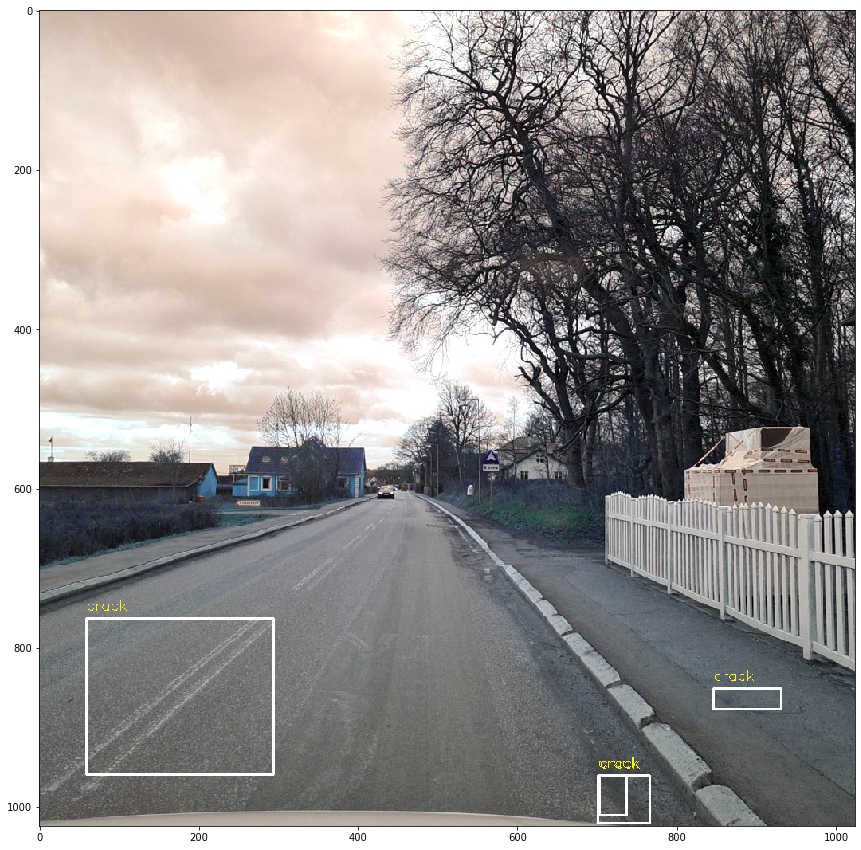

In [7]:
output_img = one_frame.copy()
for row in frame_boxes_df.values.tolist():
    x1 = float(row[2]) - 1
    y1 = float(row[3]) - 1
    x2 = float(row[4]) - 1 + x1
    y2 = float(row[5]) - 1 + y1
    draw_bounding(output_img, int(x1), int(x2), int(y1), int(y2), "crack")
print_img(output_img)

In [8]:
fourcc = cv2.VideoWriter_fourcc(*"MJPG")
writer = cv2.VideoWriter("tracktor_video.avi", fourcc, 30, (1024, 1024), True)
for i in range(100):
    one_frame = get_img(file_path[i])
    frame_boxes_df = model_output[model_output["1"] == i]
    output_img = one_frame.copy()
    for row in frame_boxes_df.values.tolist():
        x1 = float(row[2]) - 1
        y1 = float(row[3]) - 1
        x2 = float(row[4]) - 1 + x1
        y2 = float(row[5]) - 1 + y1
        draw_bounding(output_img, int(x1), int(x2), int(y1), int(y2), "Object " + str(row[1]))
    writer.write(output_img)
writer.release()


In [9]:
model_output["1"]

0        2
1        3
2        4
3        5
4        4
      ... 
279     96
280     97
281     98
282     99
283    100
Name: 1, Length: 284, dtype: int64